## Keras for Deep Learning
<br>
Keras is an open source python module for neural networks. It is a wrapper for popular deep learning modules such as tensorflow or theano that provides intuitive and clean, simple API. The example here is going to be similar to our previous notebook, classify Reuters newswires. Code example is adapted from [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet. 

In [79]:
from keras.datasets import reuters
import numpy as np 
import pandas as pd

max_words = 10000  # use most common 10000 words 

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=max_words)

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results 

y_train = to_one_hot(train_labels) # one hot 
y_test = to_one_hot(test_labels) 

### Train Nueral Network with Keras 

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [95]:
batch_size = 32
epochs = 10
num_classes = 46

In [96]:
model = Sequential()
model.add(Dense(64, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 5s 649us/step - loss: 1.6145 - acc: 0.6653 - val_loss: 1.2176 - val_acc: 0.7397
Epoch 2/10
8083/8083 [==============================] - 5s 605us/step - loss: 0.9160 - acc: 0.7980 - val_loss: 1.0242 - val_acc: 0.7775
Epoch 3/10
8083/8083 [==============================] - 5s 599us/step - loss: 0.6833 - acc: 0.8431 - val_loss: 0.9471 - val_acc: 0.7842
Epoch 4/10
8083/8083 [==============================] - 5s 616us/step - loss: 0.5340 - acc: 0.8765 - val_loss: 0.9211 - val_acc: 0.7920
Epoch 5/10
8083/8083 [==============================] - 5s 620us/step - loss: 0.4323 - acc: 0.8997 - val_loss: 0.9039 - val_acc: 0.7953
Epoch 6/10
8083/8083 [==============================] - 5s 638us/step - loss: 0.3603 - acc: 0.9149 - val_loss: 0.8966 - val_acc: 0.7976
Epoch 7/10
8083/8083 [==============================] - 5s 630us/step - loss: 0.3087 - acc: 0.9271 - val_loss: 0.9308 - val_acc: 0.8098
E

In [98]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 218us/step
Test score: 0.9980721463078595
Test accuracy: 0.7818343722172751


In [108]:
model_predict = np.argmax(model.predict(X_test), axis=1) 
pd.crosstab(test_labels, model_predict, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3,4,6,7,8,9,10,...,35,36,37,39,40,41,42,43,44,45
Actual Class,,,,,,,,,,,,,,,,,,,,,
0,8,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,80,1,7,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,5,1,760,30,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,6,0,35,406,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
5,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,4,5,0,0,27,0,0,...,0,0,0,0,0,1,0,0,0,0


### Plot Training and Validation Loss

In [103]:
import matplotlib.pyplot as plt 

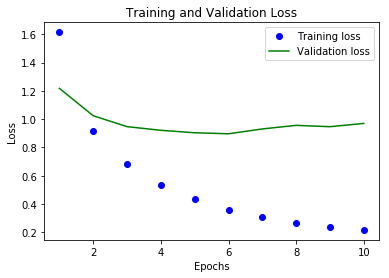

In [106]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

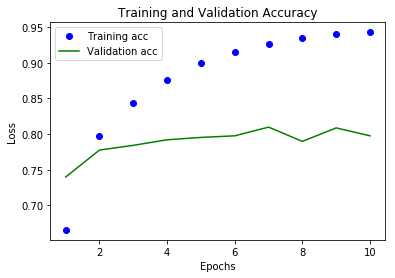

In [107]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()